<a href="https://colab.research.google.com/github/ArulR1006/Dataset/blob/main/Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [200]:
# Importing libraries

!pip3 install -U ucimlrepo

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import adjusted_rand_score, accuracy_score, silhouette_score, make_scorer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import IsolationForest
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.impute import SimpleImputer
from ucimlrepo import fetch_ucirepo




**Goal:**
Analyze and model a heart disease dataset sourced from the UCI Machine Learning Repository. Use various unsupervied machine leanring method for this dataset.

**The primary objectives are:**

Data Preparation:

Load, clean and preprocess a dataset containing a mix of numerical (integer) and categorical features (e.g: age, sex, cholesterol, chest pain type).

Visualization:
visualize data relationships using tools like pair plots and PCA.

Model Building:

Apply various machine learning algorithms, primarily unsupervised methods like K-Means and Hierarchical Clustering and one supervised method.

Hyperparameter Tuning:

Optimize model parameters using GridSearchCV.

Prediction:

Use the models to predict and compare these findings against the known clinical labels.

In [201]:

#Loading the data
from ucimlrepo import fetch_ucirepo, list_available_datasets

heart_disease = fetch_ucirepo(id=45)

print(heart_disease.variables)

        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2              

Column Description:

age	- Integer	Patient's age in years.

sex	- Categorical	Gender (0: Female, 1: Male).

cp	- Categorical	Chest pain type (various levels).

trestbps	- Integer	Resting blood pressure (mm Hg).

chol	- Integer	Serum cholesterol (mg/dl).

fbs	- Categorical	Fasting blood sugar > 120 mg/dl (0/1).

restecg	- Categorical	Resting electrocardiographic results.

thalach	- Integer	Maximum heart rate achieved.

exang	- Categorical	Exercise induced angina (0/1).

oldpeak	- Integer	stress test depression induced by exercise relative to rest.

slope	- Categorical	Slope of the peak exercise stress test segment.

ca	- Integer	Number of major vessels (0-3).

thal	- Categorical	Thalassemia type (various levels).

num -  target	Integer 	Heart disease diagnosis status (0 to 4 levels).

Let's see what the data looks like...

In [202]:
# access data
X = heart_disease.data.features
y = heart_disease.data.targets

In [203]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  
0        3  0.0   6.0  
1        2  3.0   3.0  
2        2  2.0

In [204]:
print(y)

     num
0      0
1      2
2      1
3      0
4      0
..   ...
298    1
299    2
300    3
301    1
302    0

[303 rows x 1 columns]


Check for missing values:

In [205]:
missing_values_count = X.isnull().sum()
print(missing_values_count)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64


Non-Null infor using info method

In [206]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB


**Data cleanup** - Perform preprocessing using encoding and data imputation

In [207]:

numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

X_prepared = pipeline.fit_transform(X)

**Visualizations**

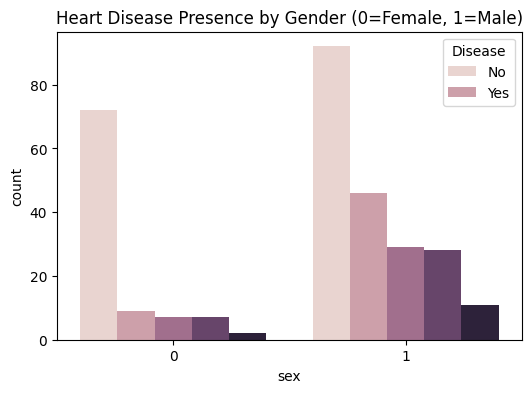

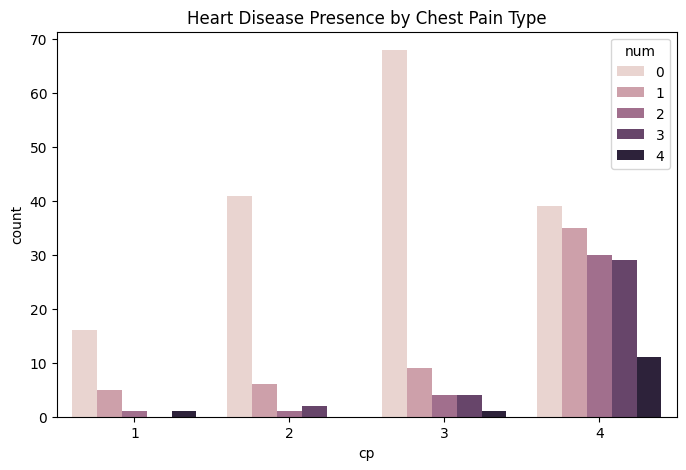

In [208]:
# 'sex' vs 'target'

df = pd.concat([X, y], axis=1)
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', hue='num', data=df)
plt.title('Heart Disease Presence by Gender (0=Female, 1=Male)')
plt.legend(title='Disease', labels=['No', 'Yes'])
plt.show()

# chest pain type vs 'target'
plt.figure(figsize=(8, 5))
sns.countplot(x='cp', hue='num', data=df)
plt.title('Heart Disease Presence by Chest Pain Type')
plt.show()

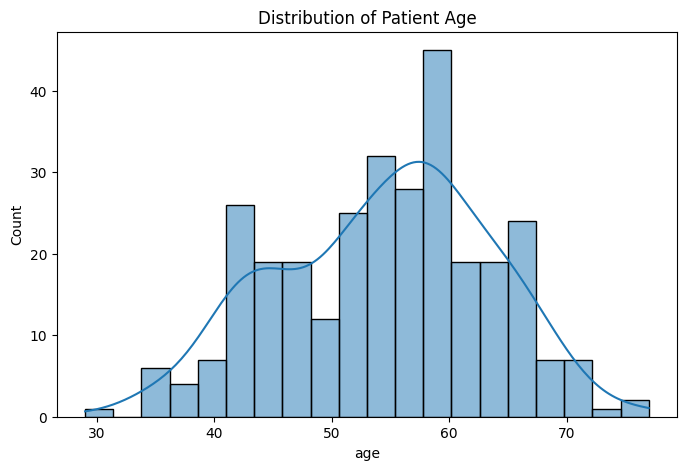

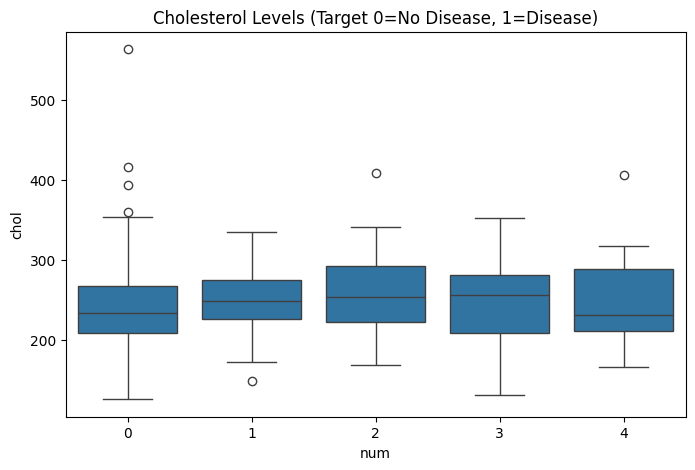

In [209]:
# Histogram for Age distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribution of Patient Age')
plt.show()

# Box plot to compare cholesterol levels for healthy vs. diseased patients
plt.figure(figsize=(8, 5))
sns.boxplot(x='num', y='chol', data=df)
plt.title('Cholesterol Levels (Target 0=No Disease, 1=Disease)')
plt.show()


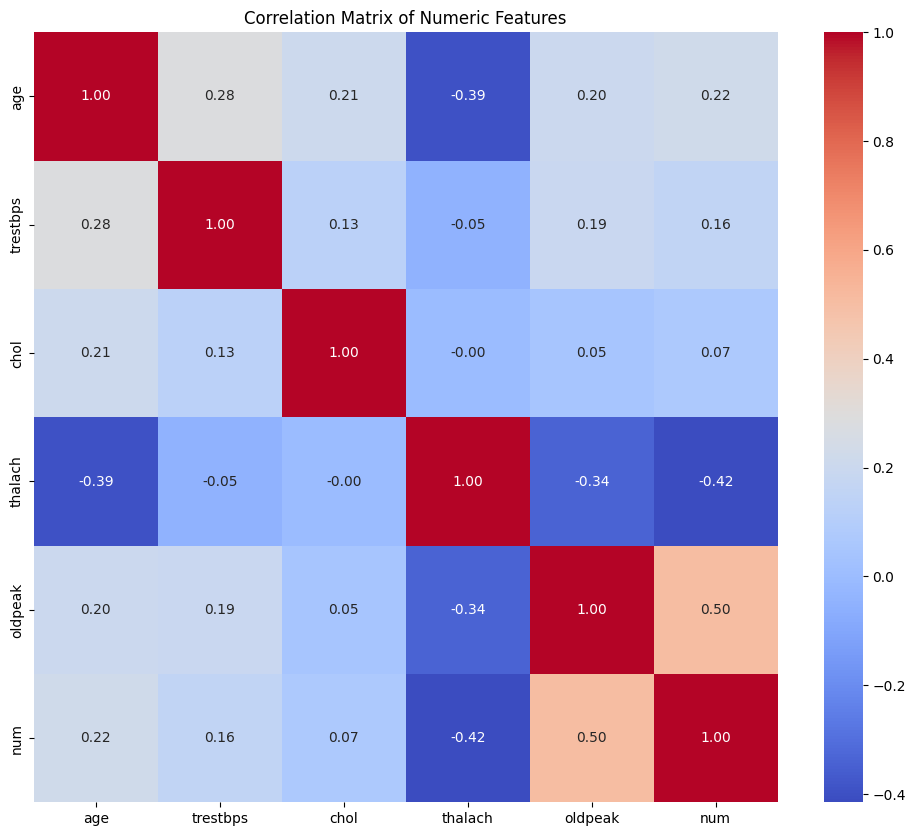

In [210]:
plt.figure(figsize=(12, 10))
integer_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Calculate the correlation matrix
corr_matrix = df[integer_features + ['num']].corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()


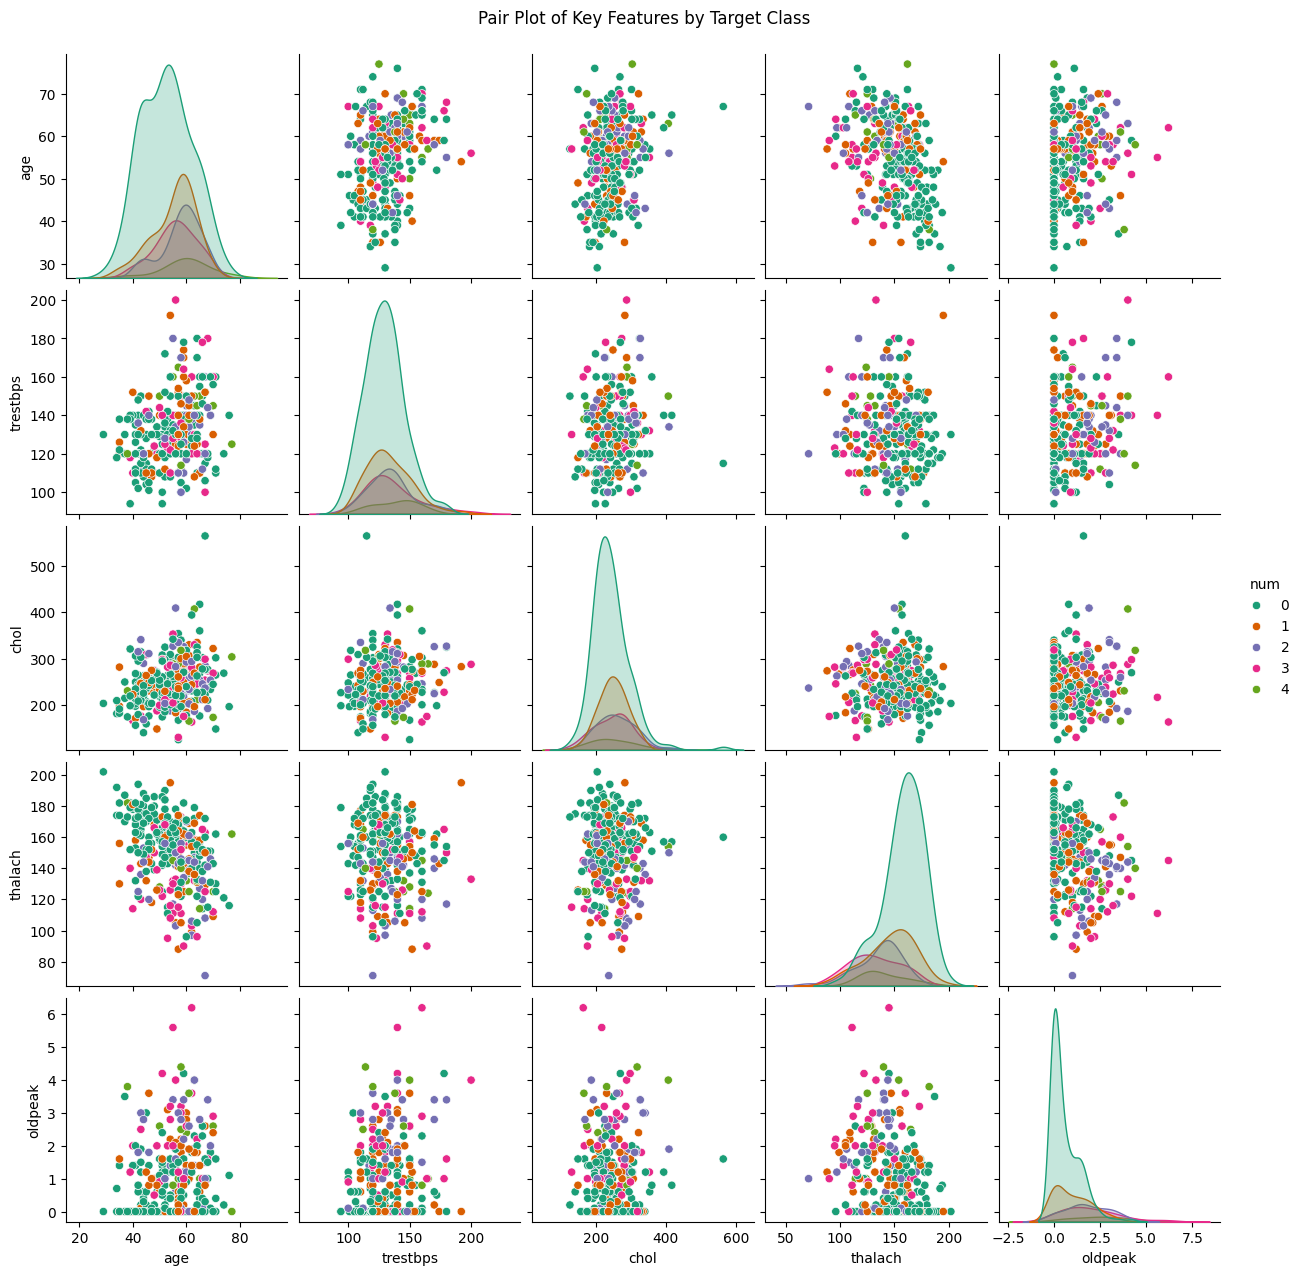

In [211]:
#pairplot for selcted columns
sns.pairplot(df, vars=['age', 'trestbps', 'chol', 'thalach', 'oldpeak'],
             hue='num', palette='Dark2')
plt.suptitle('Pair Plot of Key Features by Target Class', y=1.02)
plt.show()

In [212]:
heart_disease = fetch_ucirepo(id=45)

X = heart_disease.data.features
y = heart_disease.data.targets
y = y['num']

# Define column types
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
integer_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Preprocessing pipeline (standardization and one-hot encoding)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), integer_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Fit and transform the data
X_processed = preprocessor.fit_transform(X)


PCA is an unsupervised technique that reduces the complexity of high-dimensional data while retaining the maximum amount of variance.

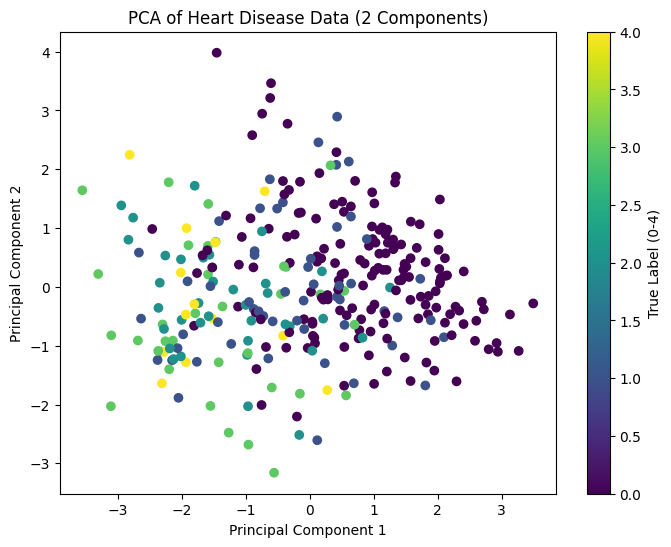

In [213]:


# Reduce data to 2 dimensions for easy visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

# Plot the results in 2D space
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA of Heart Disease Data (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='True Label (0-4)')
plt.show()


PC1 captures the most variance in the dataset. PC2 captures the second most variance.

Kmeans clustering partitions data into K non-overlapping clusters based on  similarity.
The aim is to group observations so that points within the same cluster are similar and points in different clusters are dissimilar, using Euclidean distance as the measure

In [214]:


heart_disease = fetch_ucirepo(id=45)




#Apply K-Means Clustering

kmeans_model = KMeans(n_clusters=5, random_state=42, n_init=10)
cluster_labels_pred = kmeans_model.fit_predict(X_processed)

print("Cluster labels assigned by K-Means:")
print(cluster_labels_pred)




ari_score = adjusted_rand_score(y, cluster_labels_pred)

print(f"\nAdjusted Rand Index (ARI) Score: {ari_score:.4f}")



from scipy.stats import mode

# majority vote within clusters
labels = np.zeros_like(cluster_labels_pred)
for i in range(5):
    mask = (cluster_labels_pred == i)
    labels[mask] = mode(y[mask])[0]

clustering_accuracy = accuracy_score(y, labels)
print(f"Clustering accuracy after label matching: {clustering_accuracy:.4f}")


Cluster labels assigned by K-Means:
[1 1 3 0 0 0 1 2 3 1 4 2 3 0 4 4 0 4 0 0 3 2 2 1 3 0 2 1 0 3 4 4 2 4 0 0 3
 3 3 4 1 0 2 4 2 3 4 1 2 4 0 4 0 0 3 3 4 0 4 3 3 0 3 2 3 1 1 4 1 1 2 4 3 4
 0 2 3 2 0 3 3 2 0 1 0 0 0 4 2 0 2 1 4 0 2 4 3 1 4 0 0 0 2 4 3 0 4 4 3 0 2
 3 0 1 3 0 4 0 3 1 4 1 3 1 2 0 1 3 0 4 4 0 0 0 0 2 1 3 3 0 4 2 0 3 3 0 1 0
 0 2 2 0 2 3 3 1 2 2 2 4 0 2 0 3 0 4 4 2 0 0 1 3 2 2 1 3 4 3 0 4 0 2 0 1 2
 4 0 3 2 1 0 1 3 1 3 3 4 0 0 2 0 2 4 2 0 3 3 3 4 2 0 0 0 1 0 4 0 0 3 2 0 0
 0 3 3 0 0 2 3 3 0 1 4 2 4 3 3 0 0 0 0 0 0 1 4 3 4 3 4 4 3 3 3 2 0 0 4 4 4
 4 0 2 2 0 1 3 3 3 0 0 3 1 3 3 4 4 2 0 4 4 3 0 3 0 4 1 1 4 4 0 4 2 3 1 3 0
 1 3 3 1 3 2 0]

Adjusted Rand Index (ARI) Score: 0.1679
Clustering accuracy after label matching: 0.5941


**Hierarchical clustering**
Here we are trying out hierarchical clustring techniqueue. It builds a hierarchy of clusters instead of forming a fixed number of groups like K-Means.
It produces a tree-like structure called a dendrogram, which shows how data points are merged at different distance thresholds

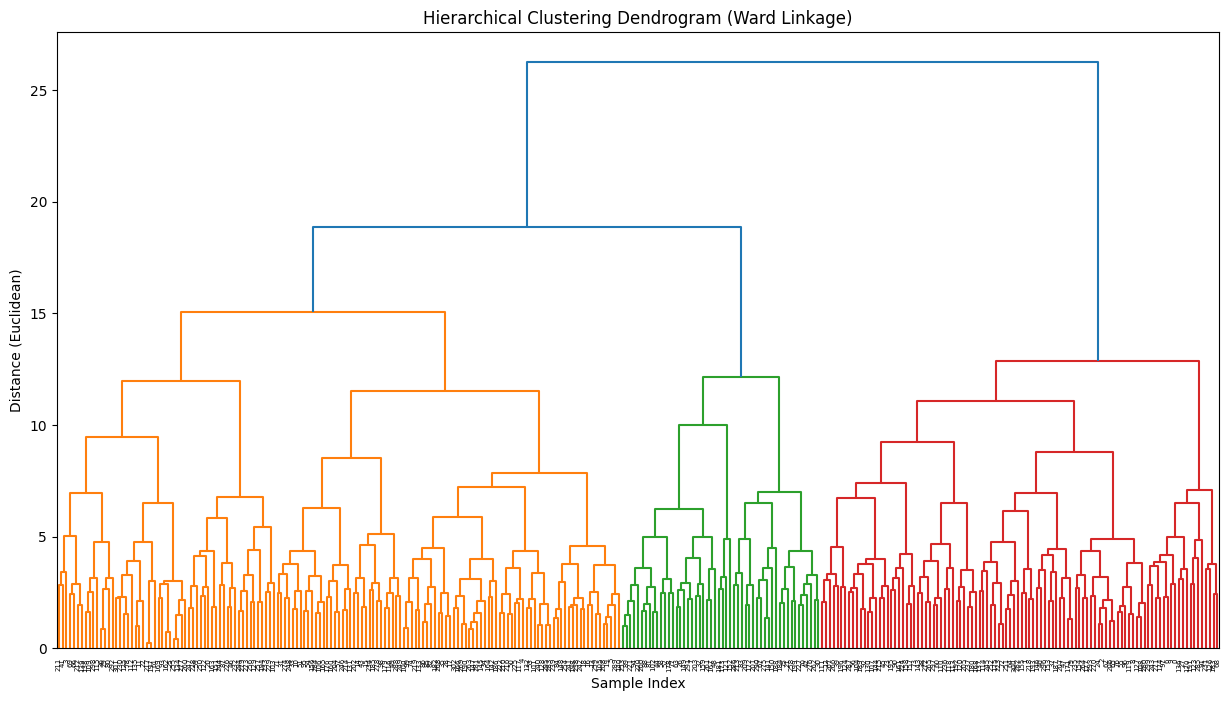

In [215]:

linked_data = linkage(X_processed, method='ward')

# Plot the dendrogram
plt.figure(figsize=(15, 8))
dendrogram(linked_data, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Distance (Euclidean)')
plt.show()


In [216]:

n_clusters_choice = 5

# we want to limit the clusters to 5 since we have target variable which captures ith 5 levels
hierarchical_model = AgglomerativeClustering(n_clusters=n_clusters_choice, metric='euclidean', linkage='ward')


cluster_labels_pred = hierarchical_model.fit_predict(X_processed)

#The Adjusted Rand Index (ARI) is a metric used to measure how similar two clusterings are, while correcting for chance.

ari_score = adjusted_rand_score(y, cluster_labels_pred)
print(f"\nAdjusted Rand Index (ARI) Score for K=5 (Hierarchical Clustering): {ari_score:.4f}")

# Calculate accuracy using label matching
labels_mapped = np.zeros_like(cluster_labels_pred)
for i in range(n_clusters_choice):
    mask = (cluster_labels_pred == i)
    if np.any(mask):
        labels_mapped[mask] = mode(y[mask], keepdims=False).mode

clustering_accuracy = accuracy_score(y, labels_mapped)
print(f"Clustering 'Purity' / 'Accuracy' for K=5 (Hierarchical Clustering): {clustering_accuracy:.4f}")



Adjusted Rand Index (ARI) Score for K=5 (Hierarchical Clustering): 0.1261
Clustering 'Purity' / 'Accuracy' for K=5 (Hierarchical Clustering): 0.5941


Use Spectral library which converts the data into a graph where edges represent similarity between points, then use graph cuts (via eigenvectors) to find clusters.

In [217]:



#SpectralClustering

spectral = SpectralClustering(
    n_clusters=n_clusters_choice,
    affinity='rbf',
    assign_labels='kmeans',
    random_state=42
)

cluster_labels_pred = spectral.fit_predict(X_processed)

print("Raw cluster labels:", np.unique(cluster_labels_pred))


labels_mapped = np.zeros_like(cluster_labels_pred)

for i in range(n_clusters_choice):
    mask = (cluster_labels_pred == i)
    if np.any(mask):
        labels_mapped[mask] = np.bincount(y[mask]).argmax()

print("Mapped cluster labels:", np.unique(labels_mapped))

#ARI
ari = adjusted_rand_score(y, labels_mapped)

print("Adjusted Rand Index:", ari)


Raw cluster labels: [0 1 2 3 4]
Mapped cluster labels: [0 1 2 3]
Adjusted Rand Index: 0.36064053024858994


Hyper parameter tuning based on k-nearest neighbors

In [218]:
best_ari = -1
best_params = None

for n_neighbors in [5, 10, 15, 20]:
    for k in [5]:
        spectral = SpectralClustering(
            n_clusters=k,
            affinity='nearest_neighbors',
            n_neighbors=n_neighbors,
            assign_labels='kmeans',
            random_state=42
        )

        cluster_labels = spectral.fit_predict(X_processed)
        ari = adjusted_rand_score(y, cluster_labels)

        print(f"k={k}, neighbors={n_neighbors}, ARI={ari:.3f}")

        if ari > best_ari:
            best_ari = ari
            best_params = {"n_clusters": k, "n_neighbors": n_neighbors}

print("\nBest Parameters:", best_params)
print("Best ARI:", best_ari)


k=5, neighbors=5, ARI=0.138
k=5, neighbors=10, ARI=0.088
k=5, neighbors=15, ARI=0.132
k=5, neighbors=20, ARI=0.134

Best Parameters: {'n_clusters': 5, 'n_neighbors': 5}
Best ARI: 0.13767705707249933


Use supervised leanring method - Random Forest is a supervised ensemble learning algorithm that builds many decision trees and combines their predictions to produce a more accurate, stable, and robust model.

In [219]:


heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features.copy()
y = heart_disease.data.targets['num'].copy()


y_bin = (y > 0).astype(int)


numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang']


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42
)

clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', rf_model)
])


X_train, X_test, y_train, y_test = train_test_split( X, y_bin, test_size=0.20, random_state=42, stratify=y_bin)



clf.fit(X_train, y_train)

#prediction
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

test_accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print("Random Forest Test Accuracy:", round(test_accuracy, 3))
print("ROC AUC Score:", round(roc_auc, 3))


Random Forest Test Accuracy: 0.885
ROC AUC Score: 0.94


**Conclusion**

The unsupervised clustering approaches applied to the heart disease dataset achieved a relatively low Adjusted Rand Index (0.3) indicating that the natural structure in the data does not align well with the true disease labels. This suggests that clustering techniques alone are insufficient to uncover the underlying patterns needed for accurate classification.

unsupervised method is still valuable because it helps uncover natural structure in the data, identify hidden subgroups and anomalies, and support exploratory analysis—especially when labels are limited or imperfect

In contrast, the supervised learning model—specifically, the Random Forest classifier—achieved a significantly higher performance, reaching an accuracy of approximately 0.90. This demonstrates that when labeled data is available, supervised models are far more effective at capturing the complex relationships between patient attributes and heart disease outcomes.